# Project Hotel

Business problem:

To build a recommendation system for the hotel industry to examine where each hotel brand stands as compared to its competition. Emphasis is given to build recommendation sytem for the customer so that they can find the best hotel on the basis of distance and pearson correlation. Along with recommendation techniques, various clustering and dimensionality techniques were used to bring insight.

### Import libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option("display.max_columns",None)

###   Reading Files 

In [2]:
df_details = pd.read_csv('Hotel_details.csv') # loading file 

In [3]:
df_details.head()

,id,hotelid,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,Source,url,curr
0,46406,1771651,Mediteran Bungalow Galeb,Vukovarska 7,Omis,Croatia,21310.0,Holiday parks,4,43.440124,16.682505,2,https://www.booking.com/hotel/hr/bungalow-luxu...,EUR
1,46407,177167,Hotel Polonia,Plac Teatralny 5,Torun,Poland,NaN,Hotels,3,53.012329,18.603800,5,https://www.agoda.com/en-gb/hotel-polonia/hote...,EUR
2,46408,1771675,Rifugio Sass Bece,"Belvedere del Pordoi,1",Canazei,Italy,38032.0,Hotels,3,46.477920,11.813350,2,http://www.booking.com/hotel/it/rifugio-sass-b...,EUR
3,46409,177168,Madalena Hotel,Mykonos,Mykonos,Greece,84600.0,Hotels,3,37.452316,25.329849,5,https://www.agoda.com/en-gb/madalena-hotel/hot...,EUR
4,46410,1771718,Pension Morenfeld,Mair im Korn Strasse 2,Lagundo,Italy,39022.0,Hotels,3,46.682780,11.131736,2,http://www.booking.com/hotel/it/pension-morenf...,EUR


In [4]:
df_details.drop(['Source','id','url'],axis=1,inplace=True) # deleting scrap variables

In [5]:
df_formula= pd.read_csv("hotel_price_min_max - Formula.csv") # loading files
df_room_attributes=  pd.read_csv('Hotel_Room_attributes.csv')
df_room_price = pd.read_csv("hotels_RoomPrice.csv")  # sincel files price and attributes are almost similar so we will use only price

In [6]:
print(df_details.shape)
print(df_formula.shape)
print(df_room_attributes.shape)
print(df_room_price.shape)

(108048, 11)
(9094, 6)
(165873, 5)
(165873, 30)


# 1. Data Cleaning

In [7]:
df_details.rename(columns={'hotelid':'hotelcode'},inplace=True) # renaming hoteld id with hotelcode to make sure that column hotelcode is same everywhere

### a. Merging files

In [8]:
merge1=pd.merge(df_details,df_formula[['hotelcode','Score','min','max']],on='hotelcode',how='inner')
merge1.shape  # checking the shape of merged files

(9665, 14)

In [9]:
final= pd.merge(merge1,df_room_price[['hotelcode','onsiterate','netrate','roomtype','ratetype','currency','guests','maxoccupancy'
         ,'discount','taxstatus','taxtype','ispromo'  ,'ratedescription' ,'roomamenities','israteperstay']]                     
                ,on='hotelcode',how='inner')  # merging relevant columns only
final.shape  # shape of finally merged files

(181426, 28)

In [10]:
final.head()  

,hotelcode,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,curr,Score,min,max,onsiterate,netrate,roomtype,ratetype,currency,guests,maxoccupancy,discount,taxstatus,taxtype,ispromo,ratedescription,roomamenities,israteperstay
0,177234,Elounda Ilion Hotel,Main Street,Crete Island,Greece,72053.0,Hotels,4,35.242699,25.728689,EUR,0.28,49.08,245.36,59.59,141.16,Double Room with Sea View,Extra low price! (non-refundable),USD,1,1,57.79,2,"City tax $ 0.30, Government Tax (Pay at the pr...",Y,"Room size: 35 m²/377 ft², Shower, 2 single bed...",Air conditioning: ;Coffee/tea maker: ;Desk: ;F...,Y
1,177234,Elounda Ilion Hotel,Main Street,Crete Island,Greece,72053.0,Hotels,4,35.242699,25.728689,EUR,0.28,49.08,245.36,49.08,89.07,Double Room with Garden View,Extra low price! (non-refundable),USD,1,1,44.90,2,"City tax $ 0.24, Government Tax (Pay at the pr...",Y,"Room size: 30 m²/323 ft², Shower, 1 double bed",Air conditioning: ;Free Wi-Fi in all rooms!: ;...,Y
2,177234,Elounda Ilion Hotel,Main Street,Crete Island,Greece,72053.0,Hotels,4,35.242699,25.728689,EUR,0.28,49.08,245.36,54.53,89.07,Double Room with Garden View,"Cancellation policy, Pay at the hotel",USD,1,1,38.78,2,"City tax $ 0.28, Government Tax (Pay at the pr...",Y,"Room size: 30 m²/323 ft², Shower, 1 double bed",Air conditioning: ;Free Wi-Fi in all rooms!: ;...,Y
3,177234,Elounda Ilion Hotel,Main Street,Crete Island,Greece,72053.0,Hotels,4,35.242699,25.728689,EUR,0.28,49.08,245.36,59.59,89.07,Double Room with Garden View,Extra low price! (non-refundable),USD,1,1,33.10,2,"City tax $ 0.30, Government Tax (Pay at the pr...",Y,"Room size: 30 m²/323 ft², Shower, 1 double bed",Air conditioning: ;Free Wi-Fi in all rooms!: ;...,Y
4,177234,Elounda Ilion Hotel,Main Street,Crete Island,Greece,72053.0,Hotels,4,35.242699,25.728689,EUR,0.28,49.08,245.36,61.33,89.07,Double Room with Garden View,Extra low price! (non-refundable),USD,1,2,31.14,2,"City tax $ 0.31, Government Tax (Pay at the pr...",Y,"Room size: 30 m²/323 ft², Shower, 1 double bed",Air conditioning: ;Free Wi-Fi in all rooms!: ;...,Y


In [11]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181426 entries, 0 to 181425
Data columns (total 28 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   hotelcode        181426 non-null  int64  
 1   hotelname        181426 non-null  object 
 2   address          180849 non-null  object 
 3   city             181426 non-null  object 
 4   country          181426 non-null  object 
 5   zipcode          94678 non-null   float64
 6   propertytype     181426 non-null  object 
 7   starrating       181426 non-null  int64  
 8   latitude         181426 non-null  float64
 9   longitude        181426 non-null  float64
 10  curr             181426 non-null  object 
 11  Score            181426 non-null  float64
 12  min              181426 non-null  float64
 13  max              181426 non-null  float64
 14  onsiterate       181426 non-null  float64
 15  netrate          181426 non-null  float64
 16  roomtype         181426 non-null  obje

### b. Checking null values

In [12]:
100*final.isnull().sum() /len(final)# null values are present in the data

hotelcode           0.000000
hotelname           0.000000
address             0.318036
city                0.000000
country             0.000000
zipcode            47.814536
propertytype        0.000000
starrating          0.000000
latitude            0.000000
longitude           0.000000
curr                0.000000
Score               0.000000
min                 0.000000
max                 0.000000
onsiterate          0.000000
netrate             0.000000
roomtype            0.000000
ratetype            2.924057
currency            0.000000
guests              0.000000
maxoccupancy        0.000000
discount            0.000000
taxstatus           0.000000
taxtype             4.940306
ispromo             0.000000
ratedescription     2.924057
roomamenities       2.924057
israteperstay       0.000000
dtype: float64

There are null values present in the ratetype, taxtype, ratediscription, roomamenities, zipcode and  address

### c. Checking duplicated rows and dropping these

In [13]:
final.duplicated().sum() # duplicated rows are there in the file

4520

In [14]:
final.drop_duplicates(subset='hotelcode',inplace=True)

In [15]:
final.drop_duplicates(inplace=True) # dropping duplicated rows

In [16]:
final.reset_index(inplace=True)

In [17]:
final.drop('index',axis=1,inplace=True)

In [18]:
final.duplicated().sum()  # checking if there is any duplicated values there or not after treatment

0

In [19]:
final.info() # checking the data type for necessary conversion if required

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hotelcode        9093 non-null   int64  
 1   hotelname        9093 non-null   object 
 2   address          8665 non-null   object 
 3   city             9093 non-null   object 
 4   country          9093 non-null   object 
 5   zipcode          4866 non-null   float64
 6   propertytype     9093 non-null   object 
 7   starrating       9093 non-null   int64  
 8   latitude         9093 non-null   float64
 9   longitude        9093 non-null   float64
 10  curr             9093 non-null   object 
 11  Score            9093 non-null   float64
 12  min              9093 non-null   float64
 13  max              9093 non-null   float64
 14  onsiterate       9093 non-null   float64
 15  netrate          9093 non-null   float64
 16  roomtype         9093 non-null   object 
 17  ratetype      

In [20]:
final['zipcode'] = final['zipcode'].astype(object)  # converting zipcode into object

In [21]:
final.shape

(9093, 28)

In [22]:
final.head(3)

,hotelcode,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,curr,Score,min,max,onsiterate,netrate,roomtype,ratetype,currency,guests,maxoccupancy,discount,taxstatus,taxtype,ispromo,ratedescription,roomamenities,israteperstay
0,177234,Elounda Ilion Hotel,Main Street,Crete Island,Greece,72053,Hotels,4,35.242699,25.728689,EUR,0.28,49.08,245.36,59.59,141.16,Double Room with Sea View,Extra low price! (non-refundable),USD,1,1,57.79,2,"City tax $ 0.30, Government Tax (Pay at the pr...",Y,"Room size: 35 m²/377 ft², Shower, 2 single bed...",Air conditioning: ;Coffee/tea maker: ;Desk: ;F...,Y
1,177240,Maistrali Hotel,Tragaki Beach,Zakynthos Island,Greece,29100,Hotels,2,37.826958,20.841570,EUR,0.35,58.53,77.58,58.53,0.00,Double Capacity 2,Cancellation policy,USD,1,1,0.00,2,Tax 13%,N,"Free Breakfast, Free Wi-Fi, Cancellation policy",Air conditioning: ;Free Wi-Fi in all rooms!: ;...,Y
2,177242,Margarita Hotel,Main Street,Santorini,Greece,84700,Hotels,2,36.425270,25.429930,EUR,0.12,63.29,213.24,63.29,0.00,Double or Twin Room,Extra low price! (non-refundable),USD,1,2,0.00,2,"City tax $ 0.32, Government Tax (Pay at the pr...",N,"Room size: 17 m²/183 ft², Balcony/terrace, Sho...",Air conditioning: ;Closet: ;Desk: ;Free Wi-Fi ...,Y


### d. Replacing null values with category naming as other

In [23]:
final['address'] = final['address'].fillna(value='Other')
final['zipcode'] = final['zipcode'].fillna(value='Other')
final['ratetype'] = final['ratetype'].fillna(value="Other")
final['ratedescription'] = final['ratedescription'].fillna(value="Other")
final['roomamenities'] = final['roomamenities'].fillna(value="Other")
final['taxtype'] = final['taxtype'].fillna(value="Other")

In [24]:
final.shape

(9093, 28)

### e. Extracting information from the columns ( roomtype, ratedescription)

In [25]:
final['Room size']=final['ratedescription'].str.split(',')

In [26]:
final['Room size']=final['Room size'].apply(lambda x: x[0])

In [27]:
final['Room size']=final['Room size'].replace(['Free Wi-Fi','Shower','Free Breakfast','Other','Non-smoking','Shower and bathtub',
'Balcony/terrace','Separate shower/bathtub','Free breakfast for {0}','Pay at the hotel','Bathtub','Street view','City view',
'Extra low price! (non-refundable)','2 bathrooms','Free Breakfast for 1','Garden view','Shared bathroom','Pay nothing until October 23',
'Sea view','Pay nothing until December 21','Nature view','Pay nothing until October 16','Pay nothing until December 6'],'Others')

In [28]:
final['Room size']=final['Room size'].replace(['Pay nothing until December 4','Pay nothing until November 8','Pay nothing until November 13','Pay nothing until October 15','Pay nothing until November 23','Pay nothing until October 26','Pay nothing until October 29','Pay nothing until December 7','Pay nothing until October 31','Pay nothing until November 24','Pay nothing until October 19','Pay nothing until November 9','Pay nothing until November 19','Kitchenette','3 bathrooms','Courtyard view','Pay nothing until January 2','Pay nothing until October 30','7 bathrooms','Book without credit card','Smoking allowed','Free cancellation before October 25',
'6 bathrooms','Lake view','Pay nothing until January 7','3 bedrooms','Free WiFi','4 bedrooms','Pay nothing until December 27','Ocean view'],'Others')

In [29]:
final['Room size']=final['Room size'].replace(['Pay nothing until December 10','Pay nothing until November 16','Pay nothing until November 11','Pay nothing until November 18','Pay nothing until December 16','Pay nothing until November 17',
'No Windows view','Pay nothing until November 14','Pay nothing until November 21','Pay nothing until November 27','Pay nothing until December 19','Pay nothing until January 4','Pay nothing until January 3','Pay nothing until November 29','Pay nothing until November 10',
'Pay nothing until November 28','Pay nothing until January 1','Pay nothing until December 5','Pay nothing until December 17','Pay nothing until November 12','Pay nothing until October 17','2 bedrooms','Pool view','Mountain view','Cancellation policy','Pay nothing until November 1'],'Others')

In [30]:
final['Room size']=final['Room size'].replace(['Beach view','Partial sea view','Private pool','All Inclusive','Pay nothing until December 26','4 bathrooms','5 bathrooms','Pay nothing until December 23','Pay nothing until November 22','Pay nothing until December 25','Pay nothing until October 27','Pay nothing until December 13','Pay nothing until October 24','Pay nothing until October 22','Pay nothing until December 15','Pay nothing until December 22','Pay nothing until November 6','Pay nothing until December 9','Pay nothing until November 4','Pay nothing until October 18','Pay nothing until October 20','Pay nothing until November 20','Pay nothing until December 11 ','Pay nothing until December 29'],'Others')

In [31]:
final['Room size']=final['Room size'].replace(['Country/region view','Pay nothing until December 24','Park view','Pay nothing until November 25','Pay nothing until December 8','Pay nothing until October 25','Pay nothing until December 1','Pay nothing until December 31','River view'],'Others')

In [32]:
final['Room size']=final['Room size'].replace(['Pay nothing until December 11','Pay nothing until October 28','Pay nothing until December 30','Pay nothing until December 18'],'Others')

In [33]:
final['Room size']=final['Room size'].replace(['Pay nothing until November 26','Pay nothing until December 28','Pay nothing until November 15'
'Pay nothing until December 2','Pay nothing until November 7','Pay nothing until October 14','Pay nothing until December 3','Pay nothing until November 5 ',
'Pay nothing until December 14 ','Pay nothing until December 20','Pay nothing until January 5','Pay nothing until December 12','Pay nothing until November 30',
'Pay nothing until October 21','Pay nothing until October 13','Pay nothing until November 3'],'Others')

In [34]:
final.head(3)

,hotelcode,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,curr,Score,min,max,onsiterate,netrate,roomtype,ratetype,currency,guests,maxoccupancy,discount,taxstatus,taxtype,ispromo,ratedescription,roomamenities,israteperstay,Room size
0,177234,Elounda Ilion Hotel,Main Street,Crete Island,Greece,72053,Hotels,4,35.242699,25.728689,EUR,0.28,49.08,245.36,59.59,141.16,Double Room with Sea View,Extra low price! (non-refundable),USD,1,1,57.79,2,"City tax $ 0.30, Government Tax (Pay at the pr...",Y,"Room size: 35 m²/377 ft², Shower, 2 single bed...",Air conditioning: ;Coffee/tea maker: ;Desk: ;F...,Y,Room size: 35 m²/377 ft²
1,177240,Maistrali Hotel,Tragaki Beach,Zakynthos Island,Greece,29100,Hotels,2,37.826958,20.841570,EUR,0.35,58.53,77.58,58.53,0.00,Double Capacity 2,Cancellation policy,USD,1,1,0.00,2,Tax 13%,N,"Free Breakfast, Free Wi-Fi, Cancellation policy",Air conditioning: ;Free Wi-Fi in all rooms!: ;...,Y,Others
2,177242,Margarita Hotel,Main Street,Santorini,Greece,84700,Hotels,2,36.425270,25.429930,EUR,0.12,63.29,213.24,63.29,0.00,Double or Twin Room,Extra low price! (non-refundable),USD,1,2,0.00,2,"City tax $ 0.32, Government Tax (Pay at the pr...",N,"Room size: 17 m²/183 ft², Balcony/terrace, Sho...",Air conditioning: ;Closet: ;Desk: ;Free Wi-Fi ...,Y,Room size: 17 m²/183 ft²


In [35]:
final=final.drop(['ratedescription'],axis=1) # as relevant information has been taken out, so dropping the ratedescription now

In [36]:
room_amenities = final['roomamenities'].str.get_dummies(sep=';')
room_amenities = room_amenities[['Air conditioning: ','Coffee/tea maker: ','Wi-Fi [free]: ','Toiletries: ']]

In [37]:
room_amenities.head()

,Air conditioning:,Coffee/tea maker:,Wi-Fi [free]:,Toiletries:
0,1,1,0,1
1,1,0,0,0
2,1,0,0,1
3,1,1,0,1
4,1,1,0,1


In [38]:
hotel_data = pd.concat([final, room_amenities], axis=1)

In [39]:
hotel_data=hotel_data.drop(['roomamenities'],axis=1) # dropping roomameities as relevant ifnformation has been taken out from it

In [40]:
hotel_data.head()

,hotelcode,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,curr,Score,min,max,onsiterate,netrate,roomtype,ratetype,currency,guests,maxoccupancy,discount,taxstatus,taxtype,ispromo,israteperstay,Room size,Air conditioning:,Coffee/tea maker:,Wi-Fi [free]:,Toiletries:
0,177234,Elounda Ilion Hotel,Main Street,Crete Island,Greece,72053,Hotels,4,35.242699,25.728689,EUR,0.28,49.08,245.36,59.59,141.16,Double Room with Sea View,Extra low price! (non-refundable),USD,1,1,57.79,2,"City tax $ 0.30, Government Tax (Pay at the pr...",Y,Y,Room size: 35 m²/377 ft²,1,1,0,1
1,177240,Maistrali Hotel,Tragaki Beach,Zakynthos Island,Greece,29100,Hotels,2,37.826958,20.841570,EUR,0.35,58.53,77.58,58.53,0.00,Double Capacity 2,Cancellation policy,USD,1,1,0.00,2,Tax 13%,N,Y,Others,1,0,0,0
2,177242,Margarita Hotel,Main Street,Santorini,Greece,84700,Hotels,2,36.425270,25.429930,EUR,0.12,63.29,213.24,63.29,0.00,Double or Twin Room,Extra low price! (non-refundable),USD,1,2,0.00,2,"City tax $ 0.32, Government Tax (Pay at the pr...",N,Y,Room size: 17 m²/183 ft²,1,0,0,1
3,177255,Sellada Beach Hotel,Perissa,Santorini,Greece,84703,Hotels,4,36.353432,25.472145,EUR,0.16,86.61,148.98,86.61,0.00,Double,Extra low price! (non-refundable),USD,1,1,0.00,2,Tax 13%,N,Y,Room size: 18 m²/194 ft²,1,1,0,1
4,177408,Hotel Krone,Rainerstrasse 1,Mondsee,Austria,5310,Hotels,4,47.855227,13.350021,EUR,0.34,45.71,115.28,65.30,0.00,Twin Room,"FREE cancellation, Pay at the hotel",USD,1,1,0.00,2,"City tax (Pay at the property) $ 1.33, VAT $ 6.53",N,Y,Room size: 11 m²/118 ft²,1,1,0,1


In [41]:
hotel_data.shape

(9093, 31)

In [42]:
df_hotel = hotel_data.copy() # making copy of hotel_data as df_hotel data would be used for manipulation and orinial data can be used for any inofrmation when needed

In [43]:
df_hotel.describe(include=object)

,hotelname,address,city,country,zipcode,propertytype,curr,roomtype,ratetype,currency,taxtype,ispromo,israteperstay,Room size
count,9093,9093,9093,9093,9093,9093,9093,9093,9093,9093,9093,9093,9093,9093
unique,8913,8436,4571,29,3272,7,8,1778,185,1,3543,2,2,99
top,Hotel Europa,Other,London,United Kingdom,Other,Hotels,EUR,Single Room,Extra low price! (non-refundable),USD,Other,N,Y,Others
freq,8,428,378,3412,4227,8975,5379,1134,3750,9093,952,6586,8900,2310


In [44]:
df_hotel.drop(columns =['hotelcode','hotelname','address','city','country','zipcode','roomtype','ratetype','currency','taxtype','Room size'],axis=1,inplace=True)

In [45]:
df_hotel.drop(columns=['guests'],axis=1,inplace=True)

In [46]:
df_hotel.head()

,propertytype,starrating,latitude,longitude,curr,Score,min,max,onsiterate,netrate,maxoccupancy,discount,taxstatus,ispromo,israteperstay,Air conditioning:,Coffee/tea maker:,Wi-Fi [free]:,Toiletries:
0,Hotels,4,35.242699,25.728689,EUR,0.28,49.08,245.36,59.59,141.16,1,57.79,2,Y,Y,1,1,0,1
1,Hotels,2,37.826958,20.841570,EUR,0.35,58.53,77.58,58.53,0.00,1,0.00,2,N,Y,1,0,0,0
2,Hotels,2,36.425270,25.429930,EUR,0.12,63.29,213.24,63.29,0.00,2,0.00,2,N,Y,1,0,0,1
3,Hotels,4,36.353432,25.472145,EUR,0.16,86.61,148.98,86.61,0.00,1,0.00,2,N,Y,1,1,0,1
4,Hotels,4,47.855227,13.350021,EUR,0.34,45.71,115.28,65.30,0.00,1,0.00,2,N,Y,1,1,0,1


# 2.Statistical summary

In [47]:
df_hotel.drop(columns =['latitude','longitude','Air conditioning: ','Coffee/tea maker: ','Wi-Fi [free]: ','Toiletries: '],axis=1).describe(exclude=object)

,starrating,Score,min,max,onsiterate,netrate,maxoccupancy,discount,taxstatus
count,9093.000000,9093.000000,9093.000000,9093.000000,9093.000000,9093.000000,9093.000000,9093.000000,9093.000000
mean,3.267458,0.569761,106.083502,206.186462,111.516346,47.846670,1.555482,9.598512,1.936325
std,0.662251,1.607877,172.404675,459.051478,144.172538,160.683976,1.103292,19.353112,0.432426
min,2.000000,0.000000,10.160000,11.800000,0.000000,0.000000,1.000000,0.000000,-1.000000
25%,3.000000,0.200000,55.010000,95.780000,56.870000,0.000000,1.000000,0.000000,2.000000
50%,3.000000,0.310000,73.670000,137.270000,78.380000,0.000000,1.000000,0.000000,2.000000
75%,4.000000,0.470000,101.380000,210.970000,111.350000,62.000000,2.000000,7.400000,2.000000
max,4.000000,87.900000,10104.050000,18083.360000,4795.000000,11957.400000,17.000000,99.650000,2.000000


From the rating it can be observed that the mininum rating of hotels are 2 and maximum is 4 , after studying the quaritile range it is sure that 75% of the hotels posses the rating of 4 star but there is no hotel with 5 star rating


From the min and max price columns it is sure that the  mininum price of hotel is $10.16 and maximum can be around $18083 , the mean price for minprice is about  $87.51

The discount provided by the hotel may vary from 0 to 99.65% , however the mean discount is %14.5

In [48]:
df_hotel.head()

,propertytype,starrating,latitude,longitude,curr,Score,min,max,onsiterate,netrate,maxoccupancy,discount,taxstatus,ispromo,israteperstay,Air conditioning:,Coffee/tea maker:,Wi-Fi [free]:,Toiletries:
0,Hotels,4,35.242699,25.728689,EUR,0.28,49.08,245.36,59.59,141.16,1,57.79,2,Y,Y,1,1,0,1
1,Hotels,2,37.826958,20.841570,EUR,0.35,58.53,77.58,58.53,0.00,1,0.00,2,N,Y,1,0,0,0
2,Hotels,2,36.425270,25.429930,EUR,0.12,63.29,213.24,63.29,0.00,2,0.00,2,N,Y,1,0,0,1
3,Hotels,4,36.353432,25.472145,EUR,0.16,86.61,148.98,86.61,0.00,1,0.00,2,N,Y,1,1,0,1
4,Hotels,4,47.855227,13.350021,EUR,0.34,45.71,115.28,65.30,0.00,1,0.00,2,N,Y,1,1,0,1


# Data Visualization

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

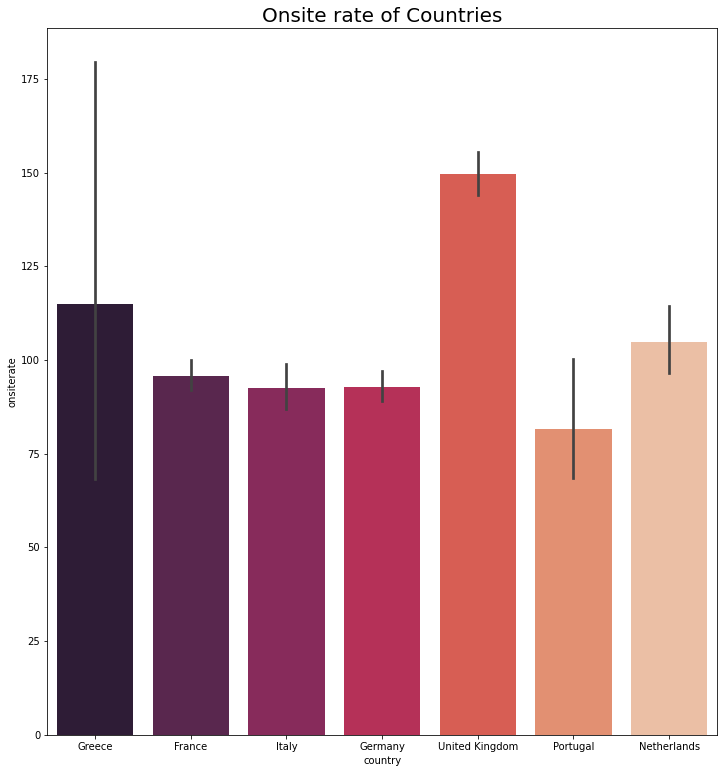

In [49]:
plt.figure(figsize=(12,13))
some_country = ('United Kingdom','Spain ','France', 'Italy', 'Germany', 'Portugal','Greece','Netherlands')
visual= hotel_data.loc[hotel_data['country'].isin(some_country) & hotel_data['onsiterate'] ]

ax = sns.barplot(x=visual['country'],y=visual['onsiterate'], palette="rocket");
ax.set_title(label='Onsite rate of Countries', fontsize=20);

UK is the country with highest onsite rate

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

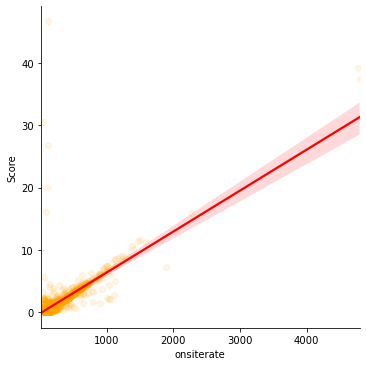

In [50]:
sns.lmplot(x = 'onsiterate', y ='Score', data = visual,scatter_kws = {'alpha':0.1,'color':'orange'},
           line_kws={'color':'red'})
plt.show()

This visualization shows that there strong linear relationship between onsite rate and score . In other word we can see that price increases with score


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

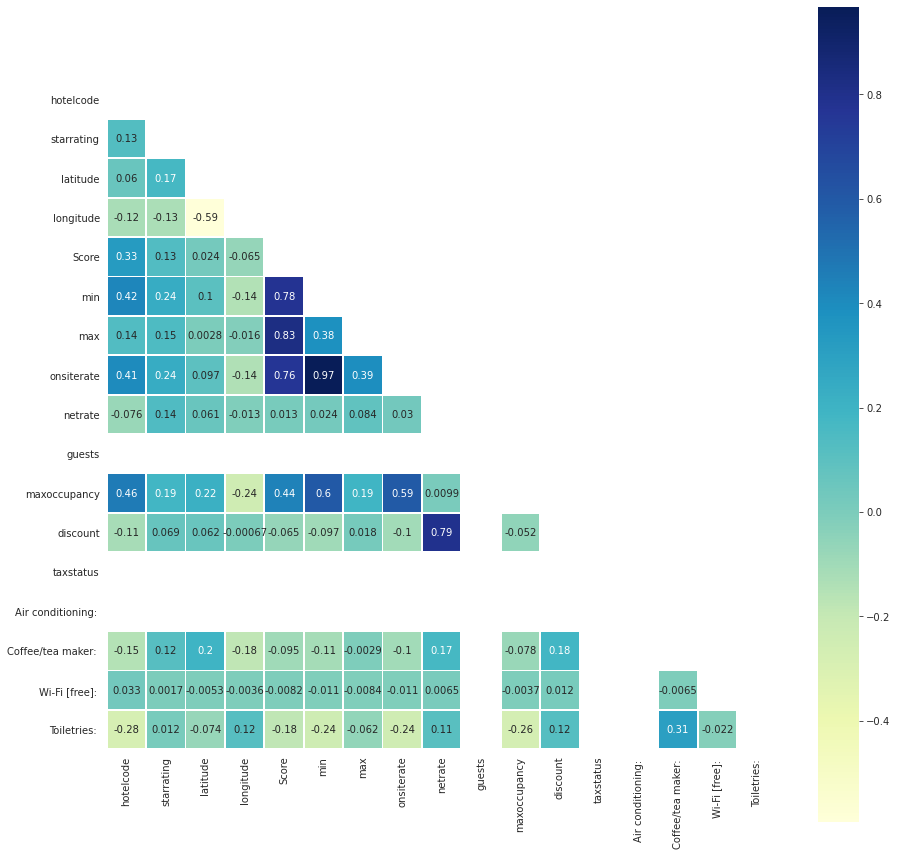

In [51]:
corr = visual.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="YlGnBu",annot=True)

From the heatmap it is clear that there is high multicollinearity in some areas: example

discount and netrate

score and minimum rate etc.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

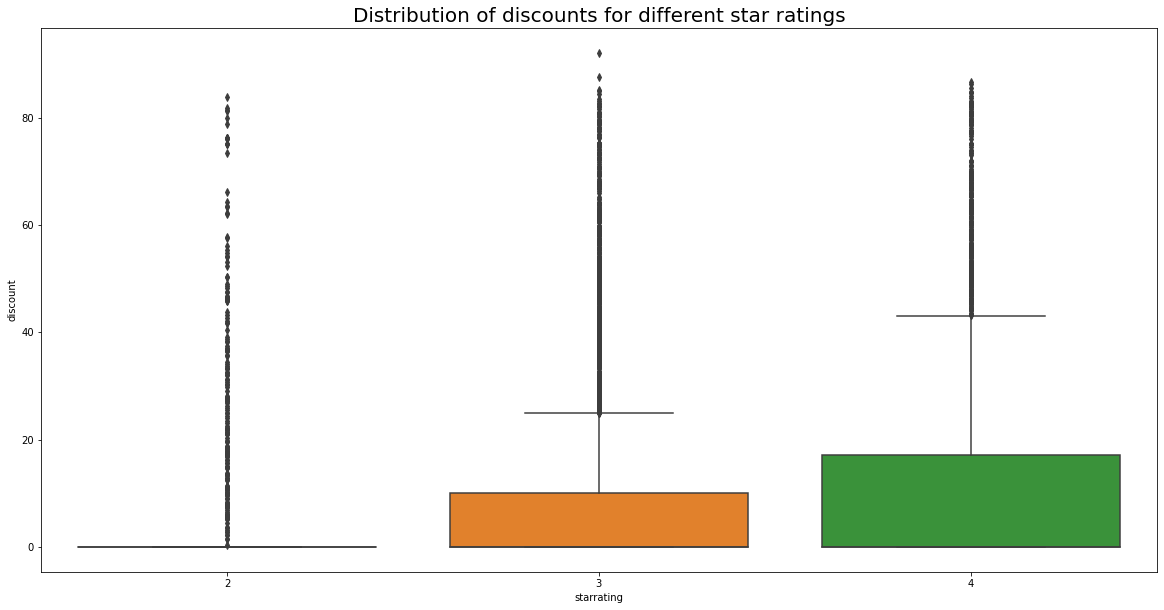

In [52]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax = sns.boxplot(x="starrating", y="discount", data=visual);
ax.set_title(label='Distribution of discounts for different star ratings', fontsize=20);

Graph conveys that the discounts offer by different star rated hotel may vary widely.However, highly rated hotels are less liklely to offer discount. 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

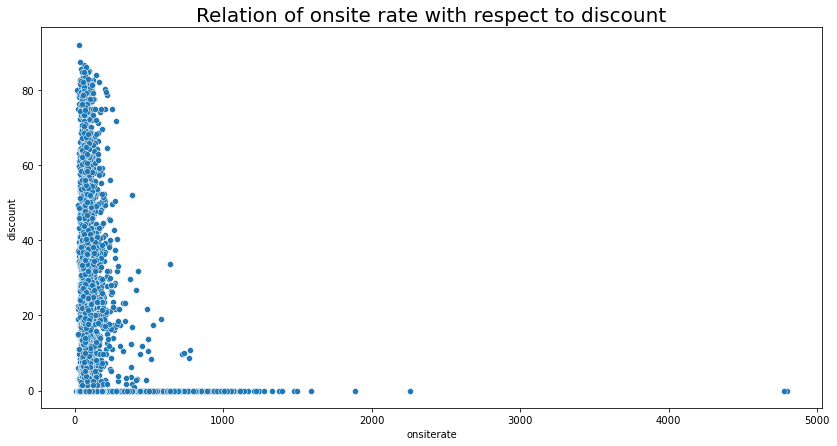

In [53]:
plt.figure(figsize=(14,7))
ax = sns.scatterplot(x='onsiterate', y='discount',
                     sizes=(1, 1),data=visual)
ax.set_title(label='Relation of onsite rate with respect to discount', fontsize=20);

This scatter plot shows that from an onsite rate range between 0 to 2000 there are lot of available discounts 
but as the onsite rate increases there are no discounts 
available this might be the case that hotel or the resort 
rooms might be luxurious and top favorite destinations 
so there might be no discounts for those bookings .


# Clustering

### a Flat clustering

In [54]:
df_hotel.size

172767

In [55]:
df_hotel =pd.get_dummies(df_hotel,columns=['propertytype','curr','taxstatus','ispromo','israteperstay','curr'],drop_first=True)# get dummies for categorical variable

In [56]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from prince import MCA
from sklearn.pipeline import Pipeline

In [57]:
df_num =df_hotel.iloc[:,0:10]
df_num.head()

,starrating,latitude,longitude,Score,min,max,onsiterate,netrate,maxoccupancy,discount
0,4,35.242699,25.728689,0.28,49.08,245.36,59.59,141.16,1,57.79
1,2,37.826958,20.841570,0.35,58.53,77.58,58.53,0.00,1,0.00
2,2,36.425270,25.429930,0.12,63.29,213.24,63.29,0.00,2,0.00
3,4,36.353432,25.472145,0.16,86.61,148.98,86.61,0.00,1,0.00
4,4,47.855227,13.350021,0.34,45.71,115.28,65.30,0.00,1,0.00


In [58]:
pca =PCA()
pca.fit(df_num)

PCA()

In [59]:
cumsum =np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.76382261, 0.89142186, 0.97817344, 0.99872606, 0.99963082,
       0.99990586, 0.99999532, 0.99999812, 0.99999961, 1.        ])

Text(0, 0.5, 'Explained variance')

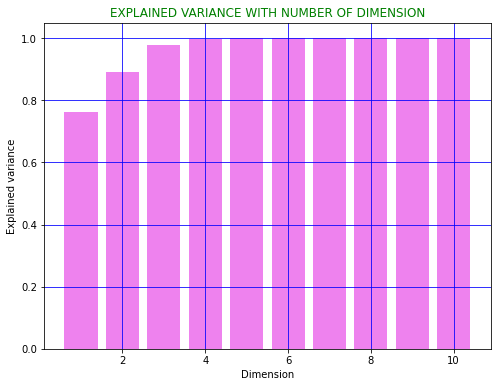

In [60]:
plt.figure(figsize=(8,6))
plt.bar(x=[i for i in range(1,11)],height=cumsum,color='violet')
plt.title("EXPLAINED VARIANCE WITH NUMBER OF DIMENSION",color='g')
plt.xlabel("Dimension")
plt.grid(True,color='blue')
plt.ylabel("Explained variance")

Grahp convey we need to select 4 dimensions in pca

In [61]:
pca =PCA(n_components=4)
X_num_pca =pca.fit_transform(df_num)

In [62]:
df_cat = df_hotel.iloc[:,10:]
df_cat.head()

,Air conditioning:,Coffee/tea maker:,Wi-Fi [free]:,Toiletries:,propertytype_Campsites,propertytype_Holiday parks,propertytype_Hotels,propertytype_Inns,propertytype_Motels,propertytype_Resorts,curr_CHF,curr_DKK,curr_EUR,curr_GBP,curr_PLN,curr_RON,curr_SEK,taxstatus_2,ispromo_Y,israteperstay_Y,curr_CHF,curr_DKK,curr_EUR,curr_GBP,curr_PLN,curr_RON,curr_SEK
0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0
2,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0
3,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0
4,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0


In [63]:
df_cat.shape

(9093, 27)

In [64]:
mca =MCA(n_components=27)
mca.fit(df_cat)

MCA(n_components=27)

In [65]:
cumsum_cat =np.cumsum(np.array(mca.eigenvalues_)/sum(mca.eigenvalues_))
cumsum_cat  # at 22 we are almost getting 1

array([0.10987838, 0.21931121, 0.32598637, 0.43199736, 0.53522732,
       0.63207871, 0.69023737, 0.7398099 , 0.78914246, 0.83656085,
       0.88042462, 0.92426245, 0.95775323, 0.98352576, 0.99626824,
       0.99992414, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

Text(0, 0.5, 'Explained variance')

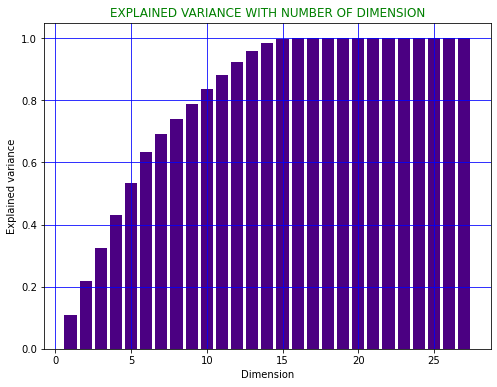

In [66]:
plt.figure(figsize=(8,6))
plt.bar(x=[i for i in range(1,28)],height=cumsum_cat,color='indigo')
plt.title("EXPLAINED VARIANCE WITH NUMBER OF DIMENSION",color='g')
plt.xlabel("Dimension")
plt.grid(True,color='blue')
plt.ylabel("Explained variance")

from the graph we can choose the dimension as 16 which almost give information about explained variance of  99.99 percent

In [67]:
mca =MCA(n_components=16)
X_cat_mca =mca.fit_transform(df_cat)

In [68]:
X_cat_mca.shape

(9093, 16)

In [69]:
X_cat_mca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.014979,-0.032111,-0.049622,-0.066400,0.276742,-0.010089,-0.024845,-0.020980,-0.010793,-0.008469,0.003511,0.017652,-0.532558,-0.083593,0.067312,0.008805
1,-0.008683,-0.037703,-0.054873,-0.089263,0.530867,-0.020475,-0.029953,-0.077739,-0.000099,-0.018196,-0.000245,-0.023140,0.319041,0.116980,0.275320,-0.051413
2,-0.011335,-0.034755,-0.052811,-0.077100,0.478946,-0.016610,-0.030103,-0.063313,-0.001829,-0.011222,0.015096,-0.019249,0.201029,-0.029846,-0.182833,-0.001911
3,-0.015916,-0.035220,-0.050837,-0.072408,0.327889,-0.014825,-0.024985,-0.030502,-0.005642,0.000085,0.015689,-0.003178,-0.089081,-0.457269,0.057932,-0.000272
4,-0.015916,-0.035220,-0.050837,-0.072408,0.327889,-0.014825,-0.024985,-0.030502,-0.005642,0.000085,0.015689,-0.003178,-0.089081,-0.457269,0.057932,-0.000272


In [70]:
X_num_pca.shape

(9093, 4)

In [71]:
X_combined_mca_pca = np.column_stack((X_num_pca,X_cat_mca))  # stacking both pca and mca columns
X_combined_mca_pca.shape

(9093, 20)

In [72]:
scaler =MinMaxScaler()
Xs =scaler.fit_transform(X_combined_mca_pca)  #  scaling 

In [73]:
Xs.shape

(9093, 20)

### K means clustering

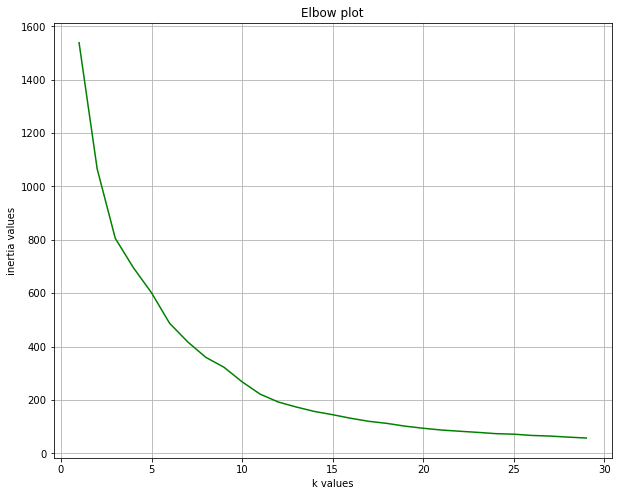

In [74]:
from sklearn.cluster import KMeans
X = Xs
error = []

for k in range(1,30):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    error.append(kmeans.inertia_)
    
# Visualization of k values:
plt.figure(figsize=(10,8))
plt.plot(range(1,30), error, color='green')
plt.title('Elbow plot')
plt.xlabel('k values')
plt.ylabel('inertia values')
plt.grid(True)
plt.show()

Elbow plot shows that the value of k for cluster should be 9

In [75]:
from sklearn.metrics import silhouette_score

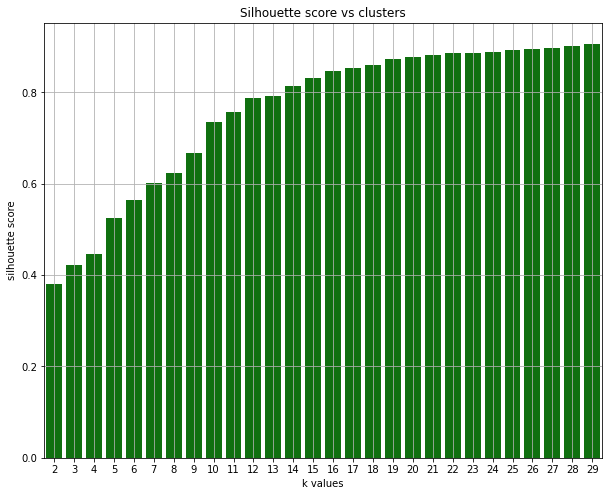

In [76]:
from sklearn.cluster import KMeans
X = Xs
score = []

for k in range(2,30):
    kmeans = KMeans(n_clusters=k)
    label =kmeans.fit_predict(X)
    score.append(silhouette_score(X,label))
    
# Visualization of k values:
plt.figure(figsize=(10,8))
sns.barplot(x=[val for val in range(2,30)], y=score, color='green')
plt.title('Silhouette score vs clusters')
plt.xlabel('k values')
plt.ylabel('silhouette score')
plt.grid(True)
plt.show()

In [77]:
#From both silhouette score and elbow plot we choose cluster's number=9

In [78]:
kmeans = KMeans(n_clusters=9)
cluster =kmeans.fit_predict(Xs)

In [79]:
df_hotel['clusterKmeans'] = cluster
df_hotel.head()

,starrating,latitude,longitude,Score,min,max,onsiterate,netrate,maxoccupancy,discount,Air conditioning:,Coffee/tea maker:,Wi-Fi [free]:,Toiletries:,propertytype_Campsites,propertytype_Holiday parks,propertytype_Hotels,propertytype_Inns,propertytype_Motels,propertytype_Resorts,curr_CHF,curr_DKK,curr_EUR,curr_GBP,curr_PLN,curr_RON,curr_SEK,taxstatus_2,ispromo_Y,israteperstay_Y,curr_CHF,curr_DKK,curr_EUR,curr_GBP,curr_PLN,curr_RON,curr_SEK,clusterKmeans
0,4,35.242699,25.728689,0.28,49.08,245.36,59.59,141.16,1,57.79,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,1,0,0,0,0,5
1,2,37.826958,20.841570,0.35,58.53,77.58,58.53,0.00,1,0.00,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,2
2,2,36.425270,25.429930,0.12,63.29,213.24,63.29,0.00,2,0.00,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
3,4,36.353432,25.472145,0.16,86.61,148.98,86.61,0.00,1,0.00,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,3
4,4,47.855227,13.350021,0.34,45.71,115.28,65.30,0.00,1,0.00,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,3


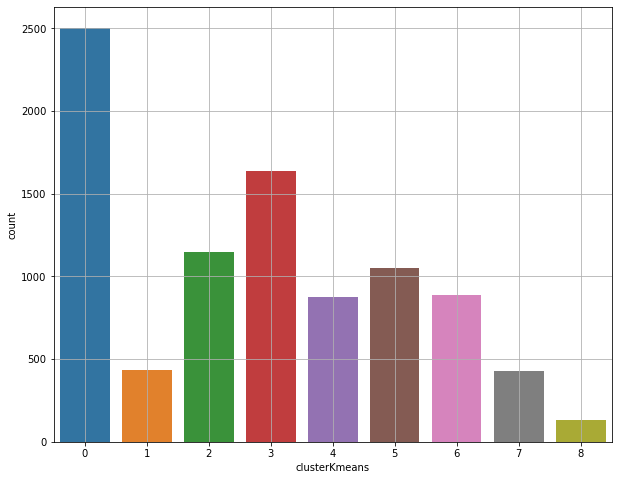

In [80]:
plt.figure(figsize=(10,8))
sns.countplot(x=df_hotel['clusterKmeans'])
plt.grid(True)
plt.show()

In [81]:
df_hotel['price_average'] = (df_hotel['max']+df_hotel['min'])/2 # making average price with min and max price 

In [82]:
df_hotel.groupby('clusterKmeans').describe()

starrating                                               \
                   count      mean       std  min  25%  50%  75%  max   
clusterKmeans                                                           
0                 2505.0  3.140918  0.694931  2.0  3.0  3.0  4.0  4.0   
1                  432.0  3.178241  0.607905  2.0  3.0  3.0  4.0  4.0   
2                 1146.0  3.111693  0.704138  2.0  3.0  3.0  4.0  4.0   
3                 1638.0  3.364469  0.600047  2.0  3.0  3.0  4.0  4.0   
4                  878.0  3.507973  0.564479  2.0  3.0  4.0  4.0  4.0   
5                 1052.0  3.481939  0.595461  2.0  3.0  4.0  4.0  4.0   
6                  887.0  3.234498  0.672941  2.0  3.0  3.0  4.0  4.0   
7                  426.0  3.154930  0.635748  2.0  3.0  3.0  4.0  4.0   
8                  129.0  3.387597  0.577035  2.0  3.0  3.0  4.0  4.0   

              latitude                                                        \
                 count       mean       std        min        25%        50%   
clusterKmeans                                                                  
0               2505.0  47.384947  5.257704  27.747021  43.645050  47.733822   
1                432.0  51.124630  4.643361  27.755541  50.364332  51.645569   
2               1146.0  46.033335  5.401984  27.790430  42.336761  46.332790   
3               1638.0  50.041278  5.051942   0.000000  47.817365  51.346676   
4                878.0  52.767665  1.829578  50.039970  51.420388  52.825747   
5               1052.0  49.990852  4.893144   0.000000  48.346545  51.459253   
6                887.0  47.502656  5.517141  27.756041  43.774113  48.584076   
7                426.0  49.147072  5.231501  28.064908  45.844640  50.717438   
8                129.0  46.064023  5.481529  35.927788  41.903010  46.559251   

                                    longitude                                  \
                     75%        max     count      mean       std         min   
clusterKmeans                                                                   
0              51.233978  68.654762    2505.0  6.963401  9.273762  -84.645021   
1              53.403166  65.947952     432.0  1.143504  9.116685 -111.908966   
2              49.556127  65.944290    1146.0  8.402665  9.080892  -25.660530   
3              53.089658  68.693568    1638.0  2.981107  8.122982  -17.103340   
4              53.811549  58.611919     878.0 -2.674334  1.841808   -7.932210   
5              52.629020  59.655077    1052.0  2.802304  7.384308  -25.511259   
6              51.491215  61.574829     887.0  6.313933  8.879877  -18.104679   
7              52.609306  60.318597     426.0  3.987909  8.406657  -16.731490   
8              49.291203  65.584942     129.0  6.522861  7.959781   -9.153526   

                                                          Score            \
                    25%       50%        75%        max   count      mean   
clusterKmeans                                                               
0             -1.085870  7.309168  12.834000  33.973480  2505.0  0.407960   
1             -2.666397 -0.962215   2.299163  33.950597   432.0  0.385509   
2              2.323325  8.781645  14.021313  33.638390  1146.0  0.536545   
3             -2.470853 -0.192111   7.053174  34.038586  1638.0  0.421734   
4             -4.230135 -2.798780  -1.200513   2.108860   878.0  1.695911   
5             -1.977798 -0.143193   6.785039  34.054661  1052.0  0.425257   
6             -1.124055  6.261629  12.220993  34.015869   887.0  0.405761   
7             -2.240244  1.609270   8.947263  32.407757   426.0  0.523404   
8              2.318559  7.073771  11.833136  25.620131   129.0  1.297829   

                                                                min  \
                    std   min     25%    50%     75%    max   count   
clusterKmeans                                                         
0              1.043929  0.00  0.2100  0.310  0.4400  37.50  2505

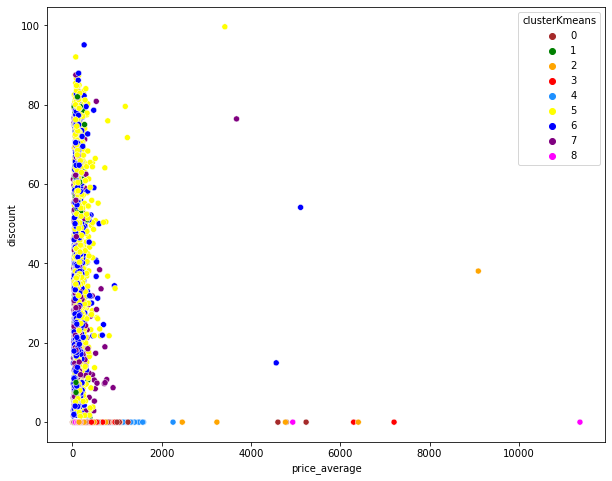

In [83]:
plt.figure(figsize=(10,8))
color_dict = dict({0:'brown',
                  1:'green',
                  2: 'orange',
                  3: 'red',
                   4: 'dodgerblue',
                  5:'yellow',
                  6:'blue',
                   7:'purple',
                   8:'magenta'
                  })
sns.scatterplot(data=df_hotel,x='price_average',y='discount',hue='clusterKmeans',palette=color_dict)
plt.show()

Most of the clusters discount varies widely and have price less than 1k but there are some which offer hardly no discount but there average price is very high

## Agglomerative clustering

In [84]:
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet

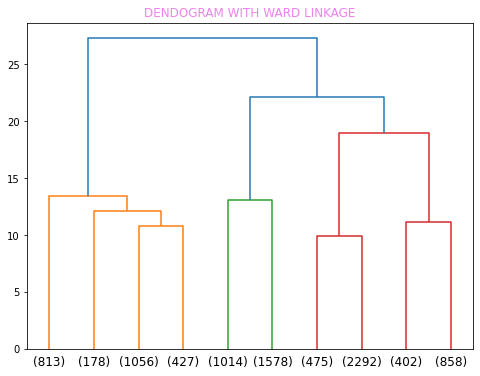

In [85]:
linkage_ward =linkage(Xs,method='ward')  # ward dendogram 
plt.figure(figsize=(8,6))
dend =dendrogram(linkage_ward,p=10, truncate_mode='lastp')
plt.title("DENDOGRAM WITH WARD LINKAGE",color='violet')
plt.show()

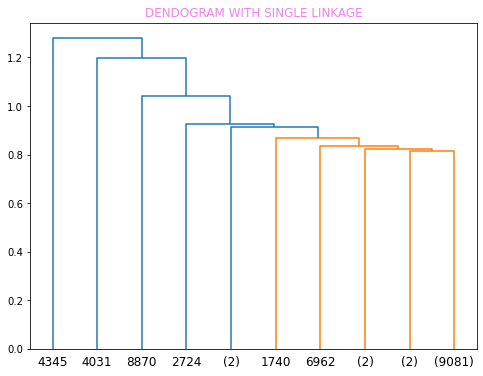

In [86]:
linkage_single=linkage(Xs,method='single')  # single dendogram 
plt.figure(figsize=(8,6))
dendrogram(linkage_single,p=10, truncate_mode='lastp')
plt.title("DENDOGRAM WITH SINGLE LINKAGE",color='violet')
plt.show()

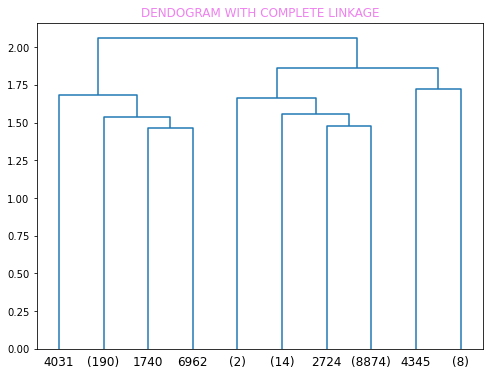

In [87]:
linkage_complete =linkage(Xs,method='complete')  # complete dendogram 
plt.figure(figsize=(8,6))
dend =dendrogram(linkage_complete,p=10, truncate_mode='lastp')
plt.title("DENDOGRAM WITH COMPLETE LINKAGE",color='violet')
plt.show()

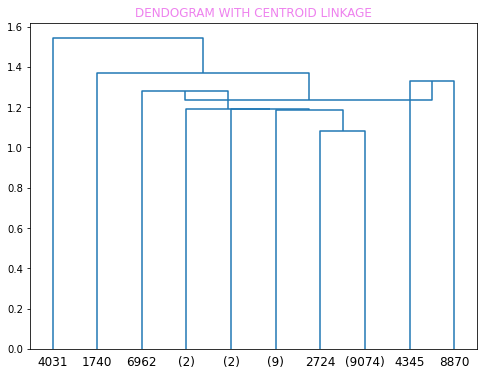

In [88]:
linkage_centroid =linkage(Xs,method='centroid')  # complete dendogram 
plt.figure(figsize=(8,6))
dend =dendrogram(linkage_centroid,p=10, truncate_mode='lastp')
plt.title("DENDOGRAM WITH CENTROID LINKAGE",color='violet')
plt.show()

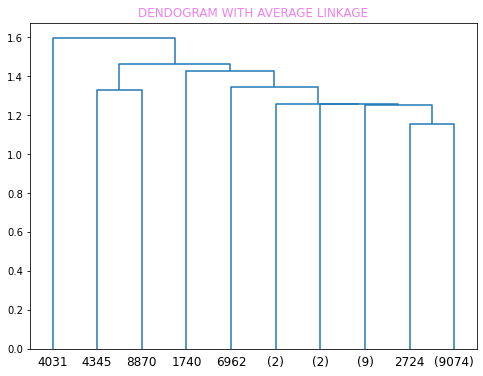

In [89]:
linkage_average =linkage(Xs,method='average')  # complete dendogram 
plt.figure(figsize=(8,6))
dend =dendrogram(linkage_average,p=10, truncate_mode='lastp')
plt.title("DENDOGRAM WITH AVERAGE LINKAGE",color='violet')
plt.show()

In [90]:
# All dendogram convey that ward is best to form linkage with three clusters

In [91]:
agg =AgglomerativeClustering(n_clusters=3)
cluster =agg.fit_predict(Xs)
df_hotel['clusteringAgglomerative']= cluster

In [92]:
df_hotel.head()

,starrating,latitude,longitude,Score,min,max,onsiterate,netrate,maxoccupancy,discount,Air conditioning:,Coffee/tea maker:,Wi-Fi [free]:,Toiletries:,propertytype_Campsites,propertytype_Holiday parks,propertytype_Hotels,propertytype_Inns,propertytype_Motels,propertytype_Resorts,curr_CHF,curr_DKK,curr_EUR,curr_GBP,curr_PLN,curr_RON,curr_SEK,taxstatus_2,ispromo_Y,israteperstay_Y,curr_CHF,curr_DKK,curr_EUR,curr_GBP,curr_PLN,curr_RON,curr_SEK,clusterKmeans,price_average,clusteringAgglomerative
0,4,35.242699,25.728689,0.28,49.08,245.36,59.59,141.16,1,57.79,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,1,0,0,0,0,5,147.220,2
1,2,37.826958,20.841570,0.35,58.53,77.58,58.53,0.00,1,0.00,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,2,68.055,1
2,2,36.425270,25.429930,0.12,63.29,213.24,63.29,0.00,2,0.00,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,138.265,0
3,4,36.353432,25.472145,0.16,86.61,148.98,86.61,0.00,1,0.00,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,3,117.795,2
4,4,47.855227,13.350021,0.34,45.71,115.28,65.30,0.00,1,0.00,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,3,80.495,2


In [93]:
df_hotel.drop('clusterKmeans',axis=1).groupby('clusteringAgglomerative').describe()

starrating                                          \
                             count      mean       std  min  25%  50%  75%   
clusteringAgglomerative                                                      
0                           4027.0  3.169109  0.681499  2.0  3.0  3.0  4.0   
1                           2474.0  3.276880  0.663086  2.0  3.0  3.0  4.0   
2                           2592.0  3.411265  0.601552  2.0  3.0  3.0  4.0   

                             latitude                                  \
                         max    count       mean       std        min   
clusteringAgglomerative                                                 
0                        4.0   4027.0  47.686569  5.448245   0.000000   
1                        4.0   2474.0  49.123734  5.309559  27.755541   
2                        4.0   2592.0  50.106162  4.884768   0.000000   

                                                                    longitude  \
                               25%        50%        75%        max     count   
clusteringAgglomerative                                                         
0                        43.916355  48.152943  51.518160  68.654762    4027.0   
1                        45.841338  50.724954  52.879506  65.947952    2474.0   
2                        48.551279  51.449548  52.969432  68.693568    2592.0   

                                                                             \
                             mean       std         min       25%       50%   
clusteringAgglomerative                                                       
0                        6.659270  9.082527  -84.645021 -1.127014  7.025080   
1                        2.985890  8.842043 -111.908966 -3.138778 -0.226598   
2                        2.695432  7.775222  -25.511259 -2.338067 -0.190256   

                                                Score                      \
                               75%        max   count      mean       std   
clusteringAgglomerative                                                     
0                        12.503773  34.015869  4027.0  0.451346  1.333052   
1                         8.823870  33.950597  2474.0  0.947320  2.490828   
2                         6.147904  34.054661  2592.0  0.393364  0.447170   

                                                           min              \
                          min   25%   50%   75%    max   count        mean   
clusteringAgglomerative                                                      
0                        0.00  0.21  0.31  0.45  46.75  4027.0   80.867296   
1                        0.01  0.22  0.36  0.64  87.90  2474.0  161.045493   
2                        0.00  0.18  0.28  0.42   5.67  2592.0   92.800204   

                                                                       \
                                std    min      25%     50%       75%   
clusteringAgglomerative                                                 
0                         59.602306  11.80  51.2300  68.800   91.9600   
1                        310.057650  10.16  54.5225  74.880  126.0475   
2                         54.541486  19.71  61.6475  80.695  105.5900   

                                      max                                 \
                              max   count        mean         std    min   
clusteringAgglomerative                                                    
0                         1004.63  4027.0  189.281455  594.885306  11.80   
1                        10104.05  2474.0  241.076140  410.849152  13.03   
2                          881.48  2592.0  199.149194  163.732403  21.92   

                                                            onsiterate  \
                            25%     50%       75%       max      count   
clusteringAgglomerative                                                  
0                         89.75  126.48  180.8400  18083.36     4027.0   
1                         93.9

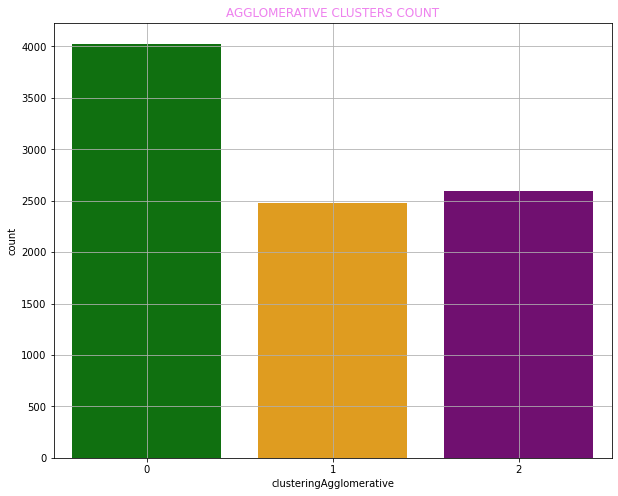

In [94]:
plt.figure(figsize=(10,8))
dic= {0:'green',
     1:'orange',
     2:'purple'}
sns.countplot(x=df_hotel['clusteringAgglomerative'],palette=dic)
plt.grid(True)
plt.title("AGGLOMERATIVE CLUSTERS COUNT",color='violet')
plt.show()

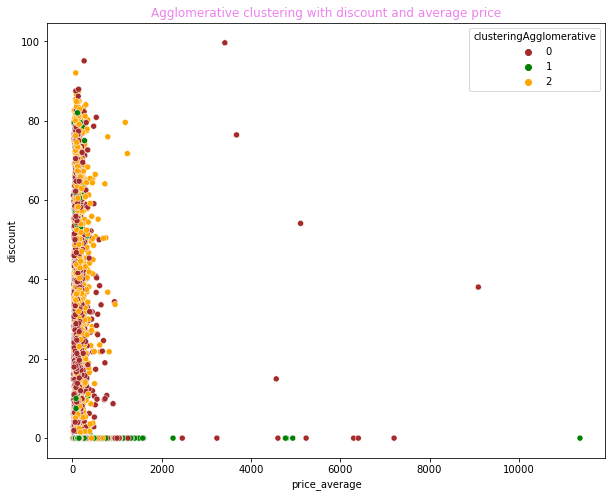

In [95]:
plt.figure(figsize=(10,8))
color_dict = dict({0:'brown',
                  1:'green',
                  2: 'orange',
                  })
sns.scatterplot(data=df_hotel,x='price_average',y='discount',hue='clusteringAgglomerative',palette=color_dict)
plt.title('Agglomerative clustering with discount and average price',color='violet')
plt.show()

The cluster patterns with 3 clusters in agglomerative and 9 clusters in k means is almost similar for discount and 
mean price

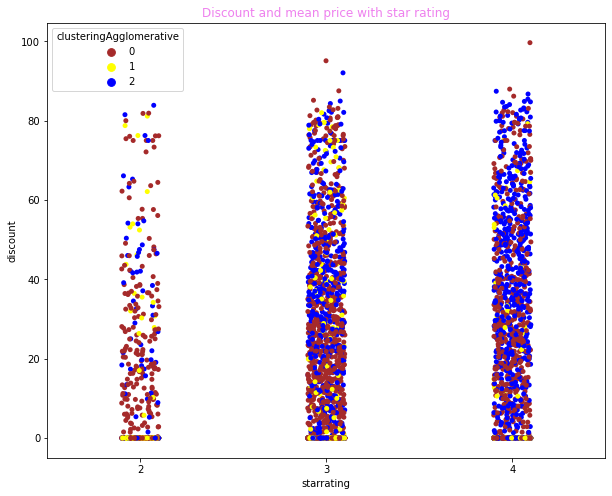

In [96]:
plt.figure(figsize=(10,8))
color_dict = dict({0:'brown',
                  1:'yellow',
                  2: 'blue',
                  })
sns.stripplot(data=df_hotel,x='starrating',y='discount',hue='clusteringAgglomerative',palette=color_dict)
plt.title("Discount and mean price with star rating",color='violet')
plt.show()

The graph shows that all cluster belongs to either rating 3 and 4 , the density for rating 2 is less compare to other ratings which shows that most of the clusters have rating 3 and 4

# Density based clustering 

In [97]:
from sklearn.cluster import DBSCAN

In [98]:
density = DBSCAN(eps = .5, min_samples =4)
density.fit(Xs)

DBSCAN(min_samples=4)

In [99]:
df_hotel['clusteringDensity'] = density.labels_

In [100]:
df_hotel['clusteringDensity'].value_counts()

 0    8858
 3     112
 1      64
-1      28
 5      10
 6       9
 4       6
 2       6
Name: clusteringDensity, dtype: int64

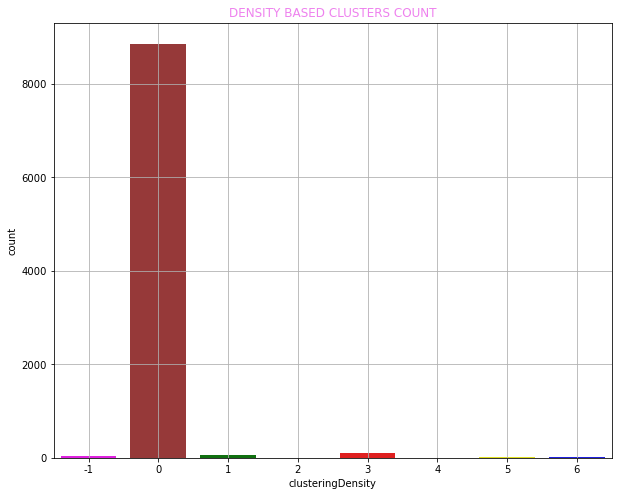

In [101]:
plt.figure(figsize=(10,8))
color_dict = dict({0:'brown',
                  1:'green',
                  2: 'orange',
                  3: 'red',
                   4: 'dodgerblue',
                  5:'yellow',
                  6:'blue',
                   7:'purple',
                   -1:'magenta'
                  })
sns.countplot(x=df_hotel['clusteringDensity'],palette=color_dict)
plt.grid(True)
plt.title("DENSITY BASED CLUSTERS COUNT",color='violet')
plt.show()

The density based clustering does not suits this data, it should be neglected as the one cluster get almost all dataset while other are getting very less

# Dealing with K medoids

In [102]:
from sklearn_extra.cluster import KMedoids

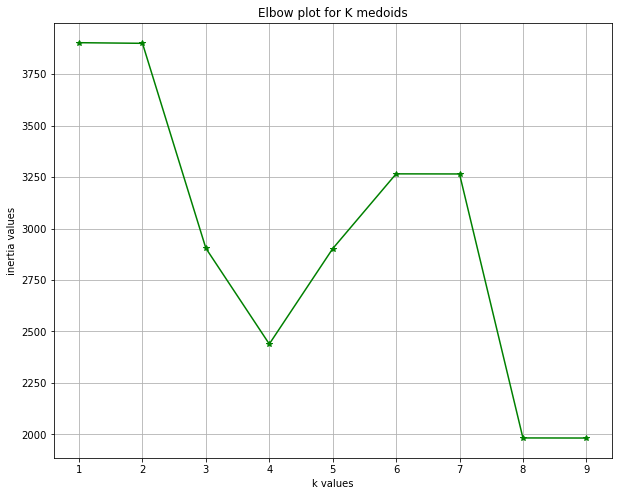

In [103]:
X = Xs
error = []

for k in range(1,10):
    kmed = KMedoids(n_clusters=k)
    kmed.fit(X)
    error.append(kmed.inertia_)
    
# Visualization of k values:
plt.figure(figsize=(10,8))
plt.plot(range(1,10), error, color='green',marker='*')
plt.title('Elbow plot for K medoids')
plt.xlabel('k values')
plt.ylabel('inertia values')
plt.grid(True)
plt.show()

Graph conveys either 4 ,8 or 9 can be choosen as value of k for the cluster to minimize the inertia

Picking 8 as value of k from the elbow plot

In [104]:
kmedoids_model = KMedoids(n_clusters=8).fit(Xs)
df_hotel['clusteringKmedoids']=kmedoids_model.labels_

In [105]:
df_hotel.drop(['clusteringDensity','clusteringAgglomerative'],axis=1).groupby('clusteringKmedoids').describe()

starrating                                               \
                        count      mean       std  min  25%  50%  75%  max   
clusteringKmedoids                                                           
0                       720.0  3.215278  0.664657  2.0  3.0  3.0  4.0  4.0   
1                      2206.0  3.398005  0.596494  2.0  3.0  3.0  4.0  4.0   
2                       367.0  3.476839  0.613048  2.0  3.0  4.0  4.0  4.0   
3                      1572.0  3.300891  0.657270  2.0  3.0  3.0  4.0  4.0   
4                      2810.0  3.259075  0.663173  2.0  3.0  3.0  4.0  4.0   
5                       176.0  3.579545  0.539239  2.0  3.0  4.0  4.0  4.0   
6                       539.0  3.187384  0.639578  2.0  3.0  3.0  4.0  4.0   
7                       703.0  2.743954  0.644848  2.0  2.0  3.0  3.0  4.0   

                   latitude                                             \
                      count       mean       std        min        25%   
clusteringKmedoids                                                       
0                     720.0  48.597498  5.029803  28.739071  45.503545   
1                    2206.0  50.713798  4.626260   0.000000  49.694296   
2                     367.0  48.211798  4.980863  27.783159  45.897402   
3                    1572.0  47.964913  5.488192   0.000000  44.436615   
4                    2810.0  48.920401  5.427844  27.755541  45.596498   
5                     176.0  46.163662  5.913680  27.747021  42.340257   
6                     539.0  47.219285  5.429274  27.808568  43.306627   
7                     703.0  46.144188  4.964469  28.416513  42.627220   

                                                    longitude             \
                          50%        75%        max     count       mean   
clusteringKmedoids                                                         
0                   49.190739  52.034428  67.209099     720.0   5.012839   
1                   51.514564  53.363706  68.693568    2206.0   1.893156   
2                   48.159138  51.430706  68.654762     367.0   5.444989   
3                   48.866896  51.794434  61.574829    1572.0   5.778023   
4                   50.459429  52.685850  65.947952    2810.0   3.732335   
5                   47.012619  50.112662  59.439011     176.0   5.859985   
6                   47.647339  51.472761  60.216740     539.0   6.756521   
7                   45.837002  50.156471  57.584370     703.0  10.188681   

                                                                           \
                          std         min       25%        50%        75%   
clusteringKmedoids                                                          
0                    7.690903  -13.867250 -1.787995   4.780466  10.101737   
1                    7.364929  -17.103340 -2.644982  -0.575175   4.444855   
2                    7.442139  -15.518270 -0.827280   6.606230  11.148565   
3                    8.693054  -25.511259 -1.163383   4.808471  11.596527   
4                    8.987397 -111.908966 -2.828885   0.380947   9.710179   
5                    8.651686  -16.543029 -0.548482   7.888521  11.590474   
6                    8.707687  -17.914525 -1.209942   7.762330  12.603655   
7                   11.165850  -84.645021  0.880055  11.656341  18.828790   

                                Score                                    \
                          max   count      mean       std   min     25%   
clusteringKmedoids                                                        
0                   32.834160   720.0  0.232764  0.082462  0.05  0.1700   
1                   34.038586  2206.0  0.417017  0.938734  0.00  0.1825   
2                   27.540800   367.0  0.690872  2.080315  0.01  0.2750   
3                   34.054661  1572.0  0.444892  0.989046  0.00  0.1800   
4                   33.950597  2810.0  0.903769  2.448583  0.01  0.2200   
5                   26.022959   176.0  0.917670  2.398564  0

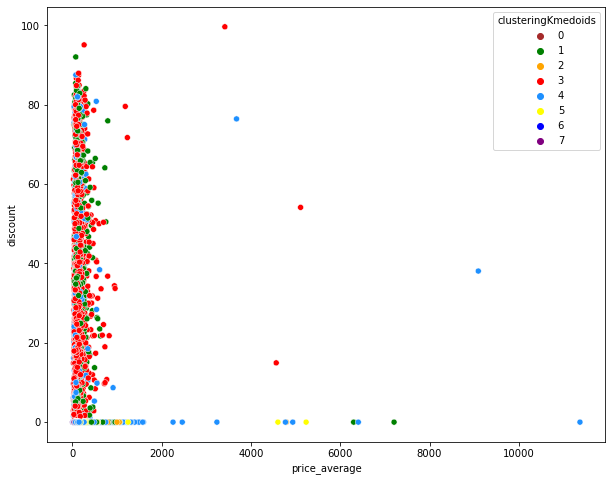

In [106]:
plt.figure(figsize=(10,8))
color_dict = dict({0:'brown',
                  1:'green',
                  2: 'orange',
                  3: 'red',
                   4: 'dodgerblue',
                  5:'yellow',
                  6:'blue',
                   7:'purple',
                   8:'magenta'
                  })
sns.scatterplot(data=df_hotel,x='price_average',y='discount',hue='clusteringKmedoids',palette=color_dict)
plt.show()

The graph is similar to other clustering algorithm like k means and  agglomerative clustering , we would go in details now to analyze further

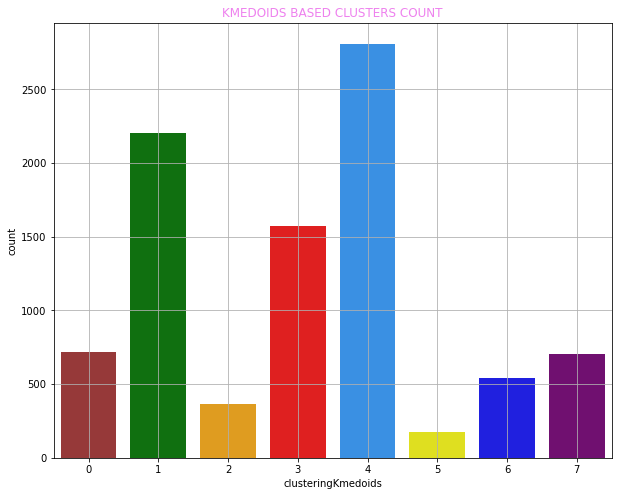

In [107]:
plt.figure(figsize=(10,8))
color_dict = dict({0:'brown',
                  1:'green',
                  2: 'orange',
                  3: 'red',
                   4: 'dodgerblue',
                  5:'yellow',
                  6:'blue',
                   7:'purple',
                   -1:'magenta'
                  })
sns.countplot(x=df_hotel['clusteringKmedoids'],palette=color_dict)
plt.grid(True)
plt.title("KMEDOIDS BASED CLUSTERS COUNT",color='violet')
plt.show()

Above countplot shows the counts of different clusters, it describe that cluster 4 and 1 contains highest count while 2 and 5 least.

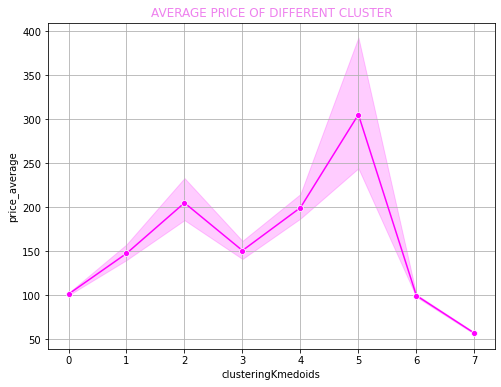

In [108]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df_hotel['clusteringKmedoids'],y=df_hotel['price_average'],marker='o',color='magenta')
plt.title("AVERAGE PRICE OF DIFFERENT CLUSTER",color='violet')
plt.grid(True)
plt.show()

The above graph make clear that the price of cluster 5 is the highest ,and cluster 0 and 7 have least price.

This clustering can be used to segment hotels on the basis of price

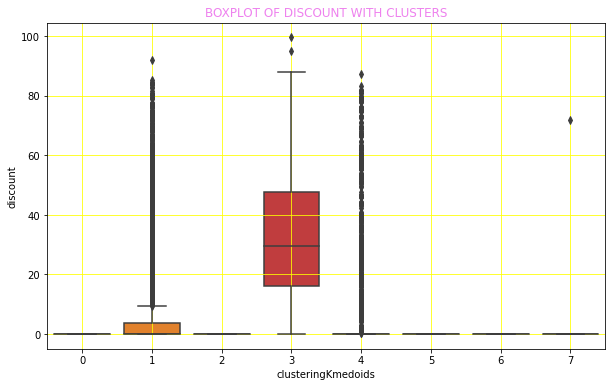

In [144]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_hotel['clusteringKmedoids'],y=df_hotel['discount'])
plt.title("BOXPLOT OF DISCOUNT WITH CLUSTERS",color='violet')
plt.grid(True,color='yellow')
plt.show()

Graph present the distribution of discount offered by different hotel , it is clear that the cluster 0,2,5 and 6 hardly offers discount to their customer.

The discount offered by cluster 1 and and 3 varies, cluster 3 offer high consistent discont while cluster 4 and 1 may offer very less or huge discount.
But the discount consistency for cluster 1 and 4 is not so good as compare to cluster3

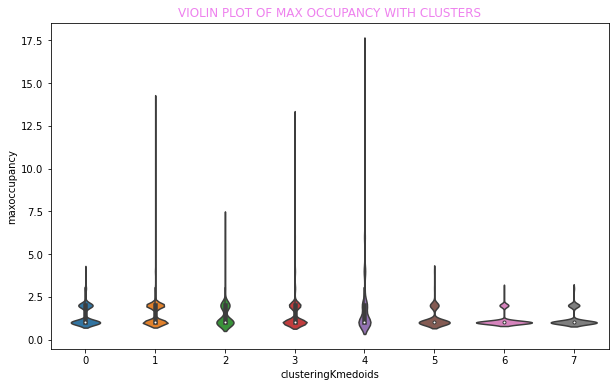

In [145]:
plt.figure(figsize=(10,6))
sns.violinplot(y=df_hotel['maxoccupancy'],x=df_hotel['clusteringKmedoids'])
plt.title("VIOLIN PLOT OF MAX OCCUPANCY WITH CLUSTERS",color='violet')
plt.show()

From the graph it is clear that all the cluster mostly offers 1 and 2 occupancy maximum in the hotel room but cluster 1 , 3 and 4 can offer highest 
occupancy of more that 12 in some hotels

# Hotel recommendation system

In [109]:
# function to calculate distance:
from math import  radians, cos, sin, asin, sqrt
def distances(series_lat,series_long,user_lat,user_long):   # pass the series as list or array only 
   
    user_lat = radians(user_lat)
    user_long = radians(user_long)
    series_long =[ radians(val) for val in series_long]
    series_lat= [radians(val) for val in series_lat]
    dlog = [ val - user_long  for val in series_long]
    dlat = [ val - user_lat  for val in series_lat]
    a = [  sin(dlat[i] / 2)**2 + cos(user_lat) * cos(series_lat[i]) * sin(dlog[i] / 2)**2   for i in range(len(dlog)) ]
    r = 6371 # radius
    c =[r*2 * asin(sqrt(val)) for val in a] # distance in km
    return c

In [110]:
user_lat=48.8566  # user location, latitude and longitude
user_long=2.3522
hotel_data['distance'] = distances(np.array(hotel_data['latitude']),np.array(hotel_data['longitude']),user_lat,user_long)

### Recommendation system based on distance

In [111]:
recommendation_numbers =5
hotel_data.sort_values(by=['distance','starrating'],ascending=[True,False]).head(recommendation_numbers) # popularity sytem sorted based on distance 

,hotelcode,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,curr,Score,min,max,onsiterate,netrate,roomtype,ratetype,currency,guests,maxoccupancy,discount,taxstatus,taxtype,ispromo,israteperstay,Room size,Air conditioning:,Coffee/tea maker:,Wi-Fi [free]:,Toiletries:,distance
9065,716226,Hotel Du Vieux Marais,8 rue du Platre,Paris,France,75004,Hotels,3,48.859066,2.355641,EUR,0.32,128.59,186.86,128.59,175.71,Single Room with Shower,"Free cancellation before November 28, 2019",USD,1,1,26.82,2,"Tax 10%, City Tax (Pay at the property) $ 2.08",Y,Y,Others,1,0,0,1,0.372234
198,181772,Hotel Britannique,20 Avenue Victoria,Paris,France,75001,Hotels,3,48.858158,2.346308,EUR,1.29,197.66,442.04,0.00,0.00,Superior Room,Other,USD,1,1,0.00,-1,Other,N,N,Others,0,0,0,0,0.464569
485,190111,Hotel Le Notre Dame,1 Quai Saint Michel,Paris,France,75005,Hotels,3,48.853088,2.346570,EUR,0.87,197.91,260.20,197.91,0.00,Double or Twin,Extra low price! (non-refundable),USD,1,1,0.00,2,"City tax (Pay at the property) $ 2.08, VAT $ 1...",N,Y,Room size: 14 m²/151 ft²,1,0,0,1,0.567571
223,7359,Novotel Paris Les Halles Hotel,"8, Place Marguerite de Navarre",Paris,France,75001,Hotels,4,48.861114,2.346434,EUR,1.72,329.52,506.33,329.52,429.54,Executive Room with 1 Double Bed,Extra low price! (non-refundable),USD,1,2,23.29,2,"Tax 10%, City Tax (Pay at the property) $ 3.18",Y,Y,Room size: 25 m²/269 ft²,1,1,0,1,0.655706
6399,60644,Best Western Premier Ducs de Bourgogne,19 Rue Du Pont Neuf,Paris,France,75001,Hotels,4,48.859997,2.344047,EUR,1.01,221.02,374.14,374.14,0.00,1 King Bed,"Free cancellation before December 18, 2019",USD,1,1,0.00,2,Tax $ 3.74,N,Y,Others,1,0,0,0,0.706000


The above distance suggests the hotel based on near by distance and then later with rating.

### Hotel Recommendations based on starrating and distances

In [112]:
recommendation_numbers=5
hotel_data.sort_values(by=['starrating','distance'],ascending=[False,True]).head(recommendation_numbers)
#  sorted based on rating first then distance

,hotelcode,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,curr,Score,min,max,onsiterate,netrate,roomtype,ratetype,currency,guests,maxoccupancy,discount,taxstatus,taxtype,ispromo,israteperstay,Room size,Air conditioning:,Coffee/tea maker:,Wi-Fi [free]:,Toiletries:,distance
223,7359,Novotel Paris Les Halles Hotel,"8, Place Marguerite de Navarre",Paris,France,75001,Hotels,4,48.861114,2.346434,EUR,1.72,329.52,506.33,329.52,429.54,Executive Room with 1 Double Bed,Extra low price! (non-refundable),USD,1,2,23.29,2,"Tax 10%, City Tax (Pay at the property) $ 3.18",Y,Y,Room size: 25 m²/269 ft²,1,1,0,1,0.655706
6399,60644,Best Western Premier Ducs de Bourgogne,19 Rue Du Pont Neuf,Paris,France,75001,Hotels,4,48.859997,2.344047,EUR,1.01,221.02,374.14,374.14,0.00,1 King Bed,"Free cancellation before December 18, 2019",USD,1,1,0.00,2,Tax $ 3.74,N,Y,Others,1,0,0,0,0.706000
5319,114227,Hotel Du Parc Saint-Severin,"22, Parcheminerie Street",Paris,France,75005,Hotels,4,48.851845,2.344857,EUR,1.00,173.80,445.05,173.80,331.53,Club Single,Extra low price! (non-refundable),USD,1,1,47.58,2,"Tax 10%, City Tax (Pay at the property) $ 3.18",Y,Y,Room size: 16 m²/172 ft²,1,1,0,1,0.753811
4505,49397,Hotel Best Western Louvre Saint Honore,"141, rue Saint-Honore",Paris,France,75001,Hotels,4,48.861732,2.340790,EUR,0.85,178.47,399.44,178.47,0.00,Classic Queen Room,Extra low price! (non-refundable),USD,1,1,0.00,2,"City tax (Pay at the property) $ 3.18, VAT $ 1...",N,Y,Others,1,1,0,1,1.011163
5041,566805,Hotel Le Lapin Blanc,41 Boulevard Saint-Michel,Paris,France,75005,Hotels,4,48.849243,2.342069,EUR,1.31,163.84,505.33,168.78,283.73,Single Classic,Extra low price! (non-refundable),USD,1,1,40.51,2,"Tax 10%, City Tax (Pay at the property) $ 3.18",Y,Y,Room size: 13 m²/140 ft²,1,1,0,1,1.103921


The rating system is very good as it will suggest the only highly rated hotel but have drawback also because the highly rated hotel may be far away from user location

### Hotel recommendation system on basisi of city

In [113]:
hotel_data = hotel_data.drop("distance",axis=1)

In [114]:
city = 'Crete Island'
recommendation_numbers=10 # choice for the number of recommendations need to be shown 
boolean_vector =hotel_data.city==city
print("YOUR TOP RECOMMENDED HOTELS ARE MENTIONED BELOW")
hotel_data[boolean_vector].sort_values(by=['starrating','discount'],ascending=[False,False]).iloc[0:recommendation_numbers,:]

YOUR TOP RECOMMENDED HOTELS ARE MENTIONED BELOW


,hotelcode,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,curr,Score,min,max,onsiterate,netrate,roomtype,ratetype,currency,guests,maxoccupancy,discount,taxstatus,taxtype,ispromo,israteperstay,Room size,Air conditioning:,Coffee/tea maker:,Wi-Fi [free]:,Toiletries:
0,177234,Elounda Ilion Hotel,Main Street,Crete Island,Greece,72053,Hotels,4,35.242699,25.728689,EUR,0.28,49.08,245.36,59.59,141.16,Double Room with Sea View,Extra low price! (non-refundable),USD,1,1,57.79,2,"City tax $ 0.30, Government Tax (Pay at the pr...",Y,Y,Room size: 35 m²/377 ft²,1,1,0,1
4829,532460,Asterias Village Resort Hotel,"Evropis, 59 St., Piskopiano, Hersonissos",Crete Island,Greece,70014,Hotels,4,35.307564,25.387112,EUR,0.58,20.33,85.52,36.46,80.29,Studio (2 Adults),Extra low price! (non-refundable),USD,1,3,54.59,2,"City tax $ 0.18, Government Tax (Pay at the pr...",Y,Y,Room size: 30 m²/323 ft²,1,1,0,1
272,741896,Kahlua Hotel and Suites,25 Martiou & Giampoudaki,Crete Island,Greece,70014,Hotels,4,35.316261,25.393881,EUR,0.29,116.69,170.39,116.69,131.33,Suite,Extra low price! (non-refundable),USD,1,2,11.15,2,"City tax $ 0.59, Government Tax (Pay at the pr...",Y,Y,Room size: 28 m²/301 ft²,1,0,0,1
205,7329534,DOM Boutique Hotel,Almirou 14,Crete Island,Greece,71202,Hotels,4,35.341042,25.133400,EUR,0.33,42.84,136.30,82.66,0.00,Promo Double Room,"Free cancellation before December 5, 2019",USD,1,1,0.00,2,"City tax 0.5%, Tax 13%",N,Y,Room size: 20 m²/215 ft²,1,0,0,1
207,7329861,Petousis Hotel & Suites,Andrea Papandreou 140,Crete Island,Greece,71414,Hotels,4,35.335499,25.068291,EUR,0.43,45.67,92.01,45.67,0.00,Double Single Use Standard,"Free cancellation before November 2, 2019",USD,1,1,0.00,2,"City tax 0.5%, Tax 13%",N,Y,Others,1,0,0,0
213,7333995,Metropole Urban Hotel,Platia Agias Ekaterinis Periokhe Ag. Mena,Crete Island,Greece,71201,Hotels,4,35.338131,25.130510,EUR,0.20,55.50,155.97,55.50,0.00,Special Offer Double or Twin Room,"Free cancellation before December 7, 2019, Pay...",USD,1,2,0.00,2,"Residential Tax (Pay at the property) $ 3.32, ...",N,Y,Room size: 19 m²/205 ft²,1,0,0,1
630,1978334,Atrium Hotel Crete,M.PORTALIOU 24,Crete Island,Greece,74100,Hotels,4,35.372929,24.480286,EUR,0.09,60.61,192.78,60.61,0.00,Single,Cancellation policy,USD,1,1,0.00,2,"City tax 0.5%, Tax 13%",N,Y,Others,1,0,0,0
2456,2603077,Pollis Hotel,11 Filonidou Zotou,Crete Island,Greece,70014,Hotels,4,35.320751,25.390270,EUR,0.50,48.19,61.33,48.19,0.00,Standard Double or Twin Room with Street View,Extra low price! (non-refundable),USD,1,2,0.00,2,"City tax $ 0.24, VAT $ 6.27",N,Y,Room size: 18 m²/194 ft²,1,1,0,1
2717,2733564,Molos Bay Hotel,Agamemnonos,Crete Island,Greece,Other,Hotels,4,35.500211,23.644777,EUR,0.05,68.80,194.93,133.01,0.00,Partial Sea View Room,Extra low price! (non-refundable),USD,1,3,0.00,2,"City tax $ 0.66, Government Tax (Pay at the pr...",N,Y,Room size: 35 m²/377 ft²,1,0,0,1
5026,565780,Patriko Traditional Stone Houses,Different Location in Vafes,Crete Island,Greece,73007,Hotels,4,35.360062,24.174580,EUR,0.54,30.67,76.91,34.08,0.00,One-Bedroom Apartment - Split Level - Left Sid...,"Free cancellation before October 19, 2019",USD,1,2,0.00,2,"City tax $ 0.17, VAT $ 4.43",N,Y,Room size: 40 m²/431 ft²,1,1,0,1


Above mentioned code good only if user want to select best hotel in city on basis of star rating first and then on the basis of distance

## Hybrid recommendation system ( an idea)

In [115]:
np.random.seed(26)  # generated user id randomly for collaborative model
hotel_data['userid'] = np.random.randint(10,900,9093)
# in data there was no user id, suppose there are user id in the data

In [116]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split, cross_validate
from surprise import KNNWithMeans,SVDpp
from surprise import accuracy  # importing libraries

In [117]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(hotel_data[['userid','hotelcode','starrating']],reader)
data=data.build_full_trainset()   

In [118]:
algo = KNNWithMeans(k=50, sim_options={'name':'pearson_baseline','user_based':False})
algo.fit(data)  # fitting daata 

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [119]:
# exmaple
hotel_id =algo.get_neighbors(data.to_inner_iid(177234), k=10) # enter hotel idd
[data.to_raw_iid(x) for x in hotel_id] # get recommended hotel id 

[177240,
 177242,
 177255,
 177408,
 177420,
 177428,
 177448,
 177522,
 177540,
 1775510]

In [120]:
from math import  radians, cos, sin, asin, sqrt
def distances(series_lat,series_long,user_lat,user_long):   # pass the series as list or array only 
   
    user_lat = radians(user_lat)
    user_long = radians(user_long)
    series_long =[ radians(val) for val in series_long]
    series_lat= [radians(val) for val in series_lat]
    dlog = [ val - user_long  for val in series_long]
    dlat = [ val - user_lat  for val in series_lat]
    a = [  sin(dlat[i] / 2)**2 + cos(user_lat) * cos(series_lat[i]) * sin(dlog[i] / 2)**2   for i in range(len(dlog)) ]
    r = 6371 # radius
    c =[r*2 * asin(sqrt(val)) for val in a] # distance in km
    return c

In [121]:
user_lat=48.8566  # assume latitue and logitude of user ( exmaple take from Paris longitude and langidute )
user_long=2.3522
hotel_data['distance'] = distances(np.array(hotel_data['latitude']),np.array(hotel_data['longitude']),user_lat,user_long) # creating distance columns by user 's location

In [122]:
distance_boolean= hotel_data['distance']<=30  # boolean vectore to find the hotel with in a distance of 30 km 
recommendation_popularity=hotel_data[distance_boolean].sort_values(['starrating','discount'],ascending =[False,False]).iloc[:,0]  
# recommendation based on starrating with 30 km distance 

hotel_id =algo.get_neighbors(data.to_inner_iid(int(recommendation_popularity[0:1].values)), k=100) # passing first recommendation
recommendation_collaborative=[data.to_raw_iid(x) for x in hotel_id]   # collaborative recommendation

recommendation_id = set.intersection(set(recommendation_collaborative),set(list(recommendation_popularity))) # taking common recommendation
if recommendation_id== set():
    recommedation_id=list(recommendation_popularity[0:5])  # if no recommendation comes via collaborative recommendation sytem in given
    # distance range, it will take 5 best recommendation based on popularity based model

In [148]:
recommendation_number=5    # code to print the hotel detail with recommendation id
i=1
for hotelid in recommendation_id:
    if i<= recommendation_number:
        print("Recommendation number:",i)
        print(hotel_data[hotel_data.hotelcode ==hotelid][['hotelname','address','starrating','distance']],'\n')
        i=i+1
    else:
        continue

Recommendation number: 1
              hotelname                address  starrating   distance
39  ibis budget Orgeval  482 ROUTE DES 40 SOUS           2  27.191557 

Recommendation number: 2
            hotelname       address  starrating  distance
74  New Hotel Candide  3 Rue Petion           3  2.169114 

Recommendation number: 3
          hotelname        address  starrating  distance
34  Timhotel Nation  7 Rue d'Avron           3   3.46941 

Recommendation number: 4
             hotelname              address  starrating  distance
20  Hotel du Romancier  6 rue Chateaubriand           4   4.08381 

